In [1]:
## Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
%matplotlib inline

In [2]:
## Import files
rc_data = pd.read_csv('roller_coasters.csv')
w_winner = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
s_winner = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')

### Part 1: Visualizing Roller Coaster Rankings

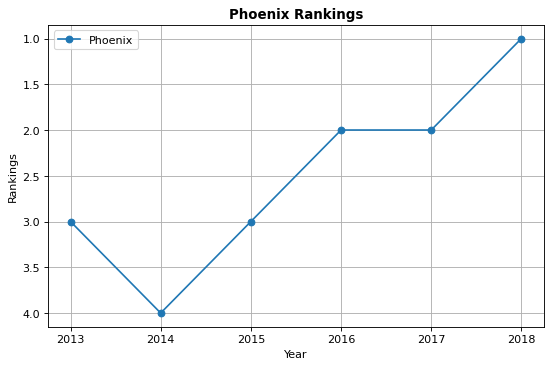

In [3]:
## Function 1: Plot the ranking of ONE roller
def plot_ranking(dataset, roller_name, location):
    roller_data = dataset[(dataset.Name == roller_name) & (dataset.Park == location)]
    plt.plot(roller_data['Year of Rank'], roller_data.Rank, label=roller_name, marker='o')
    if len(roller_data.Rank > 3):
        ax.yticks = (range(len(roller_data.Rank)))
    else: 
        ax.yticks = (range(0, 50, 5))
    plt.xlabel('Year')
    plt.ylabel('Rankings')
    plt.title(f'{roller_name} Rankings', weight='bold')
    plt.legend(loc='best')
    plt.gca().invert_yaxis()
    plt.grid()

## Test function
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8,5), dpi=80)
plot_ranking(w_winner, 'Phoenix', 'Knoebels Amusement Resort')

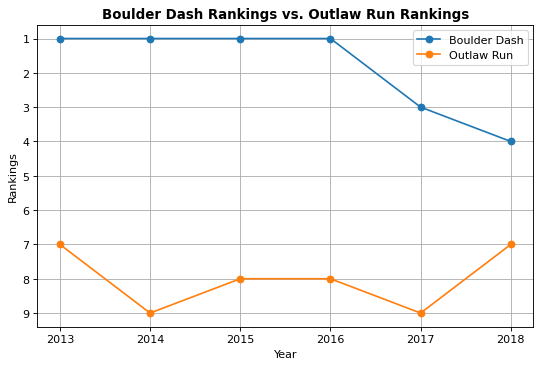

In [4]:
## Function 2: Plot the ranking of ONE roller coaster over time
def plot_two_rank(dataset, roller_1, roller_2, loc_1, loc_2):
    plot_ranking(dataset, roller_1, loc_1)
    plot_ranking(dataset, roller_2, loc_2)
    plt.title(f'{roller_1} Rankings vs. {roller_2} Rankings', weight='bold')
    plt.gca().invert_yaxis()
    plt.grid()

## Test function
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8,5), dpi=80)
plot_two_rank(w_winner, 'Boulder Dash', 'Outlaw Run', 'Lake Compounce', 'Silver Dollar City')

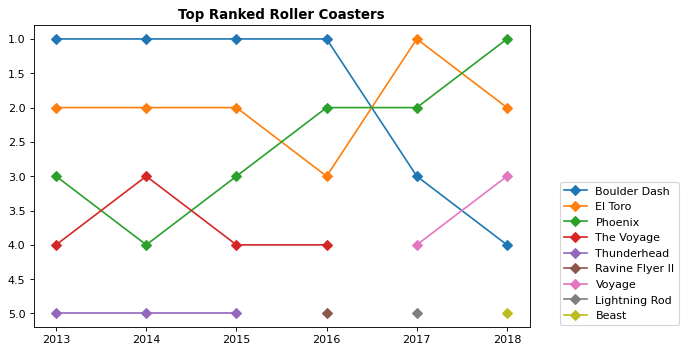

In [5]:
## Function 3: Plot time series of ranking of top n ranked roller coasters
def plot_n_ranking(dataset, n):
    dataset = dataset[dataset.Rank <= n]
    roller_list = dataset.Name.unique()
    for roller in roller_list:
        data = dataset[dataset.Name == roller]
        plt.plot(data['Year of Rank'], data.Rank, label=roller, marker='D')
        plt.legend(loc='best', bbox_to_anchor=(1.05, 0.5))
        plt.title(f'Top Ranked Roller Coasters', weight='bold')
        plt.gca().invert_yaxis()

## Test function
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8,5), dpi=80)
plot_n_ranking(w_winner, 5)

##### Part 2: Visualize Roller Coaster Data

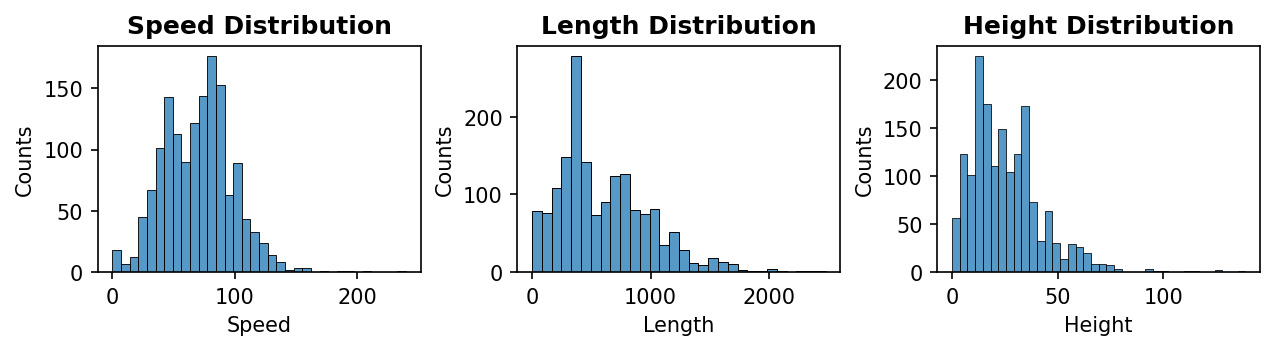

In [6]:
## Function 4: Plot a histogram of a numeric column
def plot_histogram(dataset, column):
    if column == 'height':
        plot_data = dataset[dataset[column] <= 150]
    else: 
        plot_data = dataset[dataset[column] <= 2500]
    sns.histplot(plot_data[column])
    plt.title(f'{column.title()} Distribution', weight='bold')
    plt.xlabel(column.title())
    plt.ylabel('Counts')

## Speed/Length/Height Distribution
plt.figure(figsize=(10,5), dpi=150)
plt.subplot(2,3,1)
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plot_histogram(rc_data, 'speed')
plt.subplot(2,3,2)
plot_histogram(rc_data, 'length')
plt.subplot(2,3,3)
plot_histogram(rc_data, 'height')

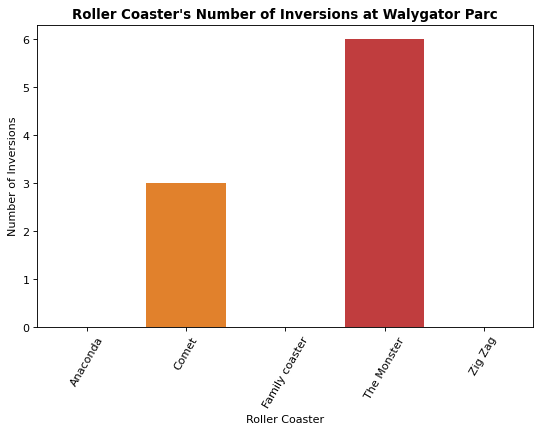

In [7]:
## Function 5: Plot a bar chart showing the number of inversions
def plot_inv(dataset, park):
    dataset = dataset[dataset.park == park]
    sns.barplot(x='name', y='num_inversions', data=dataset)
    plt.title(f'Roller Coaster\'s Number of Inversions at {park}', weight='bold')
    plt.xlabel('Roller Coaster')
    plt.ylabel('Number of Inversions')
    ax.set_xticklabels(dataset.name, rotation=60)
    
## Test function
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8,5), dpi=80)
plot_inv(rc_data, 'Walygator Parc')

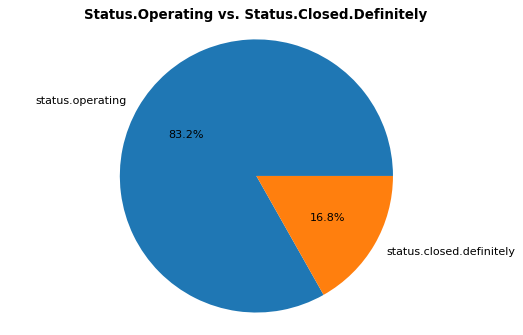

In [8]:
## Function 6: Plot a pie chart that compares the number of RC based on status
def plot_pie(dataset, status_1, status_2):
    temp_data = dataset[(dataset.status == status_1) | (dataset.status == status_2)]
    pie_data = temp_data.status.value_counts().reset_index()
    pie_data = pie_data.rename(columns={'index':'status', 'status':'count'})
    plt.pie(pie_data['count'], labels=pie_data.status, normalize=True, autopct='%0.1f%%')
    plt.title(f'{status_1.title()} vs. {status_2.title()}', weight='bold')
    plt.axis('equal')

## Test function
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8,5), dpi=80)
plot_pie(rc_data, 'status.operating', 'status.closed.definitely')

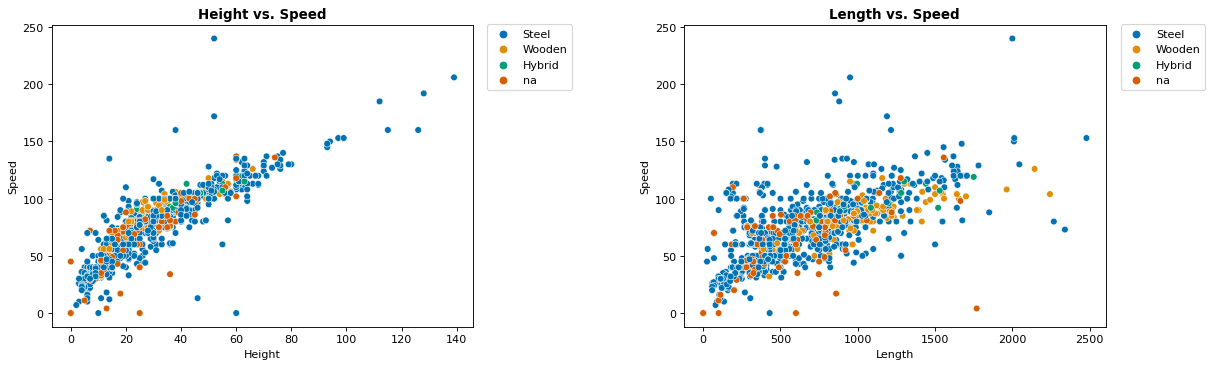

In [9]:
## Function 7: Plot a scatter plot of two numeric columns
def plot_scatter(dataset, column_1, column_2, column_3):
    if column_1 == 'height':
        plot_data = dataset[dataset[column_1] <= 150]
    else: 
        plot_data = dataset[dataset[column_1] <= 2500]
    sns.scatterplot(data=plot_data, x=column_1, y=column_2, hue=column_3, palette='colorblind')
    plt.title(f'{column_1.title()} vs. {column_2.title()}', weight='bold')
    plt.xlabel(column_1.title())
    plt.ylabel(column_2.title())

## Scatter plots
plt.figure(figsize=(17,5), dpi=80)
plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,1)
plot_scatter(rc_data, 'height', 'speed', 'material_type')
plt.legend(bbox_to_anchor=(1.02, 1.02))
plt.subplot(1,2,2)
plot_scatter(rc_data, 'length', 'speed', 'material_type')
plt.legend(bbox_to_anchor=(1.25, 1.02))
plt.show()

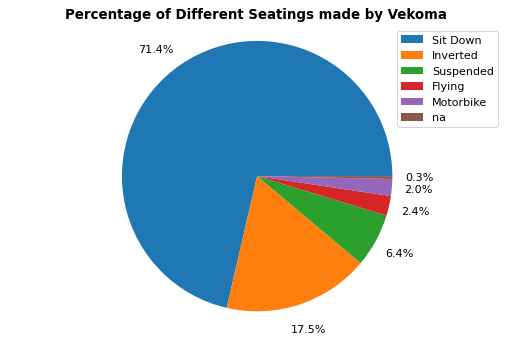

In [10]:
## Function 8: Plot a pie chart that show proporpotion of specialties
def plot_spec(dataset, prop_col, manufacturer=None, park=None):
    dataset = dataset[(dataset.manufacturer == manufacturer) | ((dataset.park == park))]
    pie_data = dataset[prop_col].value_counts().reset_index()
    pie_data = pie_data.rename(columns={'index':'type', prop_col:'count'})
    plt.pie(pie_data['count'], autopct='%0.1f%%', pctdistance=1.2)
    plt.legend(pie_data.type)
    name = prop_col.split('_')
    if manufacturer is not None:
        plt.title(f'Percentage of Different {name[0].title()}s made by {manufacturer}', weight='bold')
    if park is not None:
        plt.title(f'Percentage of Different {name[0].title()}s at {park}', weight='bold')
    plt.axis('equal')
    
## Test function
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8,5), dpi=80)
plot_spec(rc_data, 'seating_type', manufacturer='Vekoma')